# Final Project Submission

Please fill out:
* Student name: Acusio Bivona
* Student pace: self paced / part time / full time: Part Time
* Scheduled project review date/time: 
* Instructor name: James Irving, Jeff Herman
* Blog post URL:
* Video of 5-min Non-Technical Presentation:


# TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=4rem>
    
- [Introduction](#INTRODUCTION)<br>
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- [Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>
</font>
___



## RESOURCES FOR YOU 
**<font color='red'>(Delete from final notebook)</font>**

- [OVERVIEW OF OSEMiN](#OVERVIEW-OF-OSEMiN)
- [PROCESS-CHECKLIST](#PROCESS-CHECKLIST)
    - Can actually keep this part if you'd like.
- [LINKS FOR MOD 1 PROJECT](#LINKS-FOR-MOD-1-PROJECT)



# RESOURCES FOR YOU
<font color='red' weight='bold'>- NOTE: DELETE THIS SECTION & SUB SECTIONS FROM YOUR FINAL NOTEBOOK</font>

### LINKS FOR MOD 1 PROJECT
* [Blog Post: 5 steps of a data science project lifecycle](https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492)
* ML models google sheet https://docs.google.com/spreadsheets/d/1qe4nYjGKSxBNCkeV2gxxgObBpKKc0TKrbk0Y9LTrpV8
* How to detect and remove outliers:
    * https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* How to handle categorical variables. 
    * https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
* Sci-Kit Learn’s Scalers visually explained 
    * http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


## OVERVIEW OF OSEMiN

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/OSEMN.png' width=800>
<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html"> 
    </a></center>

> <font size=4em>The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 
</font>


### OSEMN DETAILS


**OBTAIN**

- This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**SCRUB**

- During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

- Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**EXPLORE**

- This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

- At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**MODEL**

- This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**iNTERPRET**

- During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  



<font color='red'>Note: Delete this markdown cell from your final project notebook</font>

## PROCESS CHECKLIST


> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
- **Interpret final model and draw >=3 conclusions and recommendations from dataset**

# <font color='red'> START YOUR CODE BELOW:</font>

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.



# OBTAIN

In [2]:
!pip install -U fsds_100719
from fsds_100719.imports import *

Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [3]:
pd.set_option('display.max_columns',0)

In [4]:
csv="https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-online-ds-pt-100719/master/kc_house_data.csv"
df = pd.read_csv(csv)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

In [5]:
#How to deal with the '?' in sqft_basement column (drop or transform?)

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean         3.373
std          0.926
min          1.000
25%          3.000
50%          3.000
75%          4.000
max         33.000
Name: bedrooms, dtype: float64


Value Counts:


3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: bedrooms, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a18dffef0>,
       dtype=object))

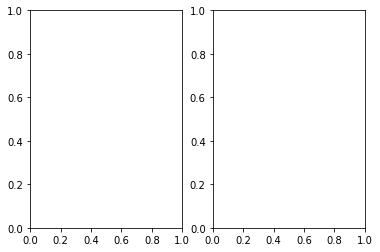

In [5]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, datatype, unqiue values
    and displays .describe()
    
    Args:
        df (df): contains the columns
        col_name (str): name of the df column to show
        n_unique (int): Number of unique values top show.
    
    Return:
        fig, ax (Matplotlib Figure and Axes)
    """
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique))
    
    ## Add some EDA figures
    fig, ax = plt.subplots(ncols=2)
    
    return fig,ax
    
    
    
check_column(df,'bedrooms')

In [6]:
df['sqft_basement'].isna().sum()
df['sqft_basement'].tail()
df['sqft_basement'].head()
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [50]:
df['sqft_basement'].astype(str).astype(float)

ValueError: could not convert string to float: '?'

In [7]:
df.info()
#Waterfront, view(only a few), yr_renovated contain null values
df.describe().round(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


In [10]:
df['waterfront'].describe()
df['waterfront'].value_counts()
#0 = no waterfront, 1 = waterfront
df['view'].describe()
df['view'].value_counts()
#What do the values mean?
df['yr_renovated'].describe()
df['yr_renovated'].value_counts()
#0 = has not been renovated

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
import seaborn as sns

In [8]:
df['waterfront'].mean()
df['waterfront'].head()
df['waterfront'].value_counts()
df['waterfront'].median()
df['waterfront'].fillna(df['waterfront'].median(), inplace=True)
df['waterfront'].isna().sum()
#Why is this happening?

0

In [10]:
df['view'].describe()
df['view'].value_counts()
new_df = df.drop(['view'],axis=1,inplace=True)
#Why is it still under oringinal df variable?

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
df['is_renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [14]:
df.drop(['id'],axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [15]:
zips = df['zipcode']
zips_series = pd.Series(zips)

In [16]:
cat_zips = zips_series.astype('category')
cat_zips

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: category
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]

In [17]:
df['labeled_zipcodes'] = cat_zips.cat.codes

In [18]:
df.drop(['zipcode'],axis=1,inplace=True)

In [154]:
df['labeled_zipcodes'].value_counts()

42    592
49    579
28    558
51    549
23    540
     ... 
35     60
61     55
14     47
24     17
27     10
Name: labeled_zipcodes, Length: 70, dtype: int64

In [19]:
df['sqft_basement'] = df['sqft_basement'].replace(to_replace=0, value=0.0)
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2600.0        1
1248.0        1
875.0         1
915.0         1
1852.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date                21597 non-null object
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null object
yr_built            21597 non-null int64
yr_renovated        17755 non-null float64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
is_renovated        21597 non-null int64
labeled_zipcodes    21597 non-null int8
dtypes: float64(7), int64(10), int8(1), object(2)
memory

In [21]:
df['sqft_basement'].astype(str).astype(float)

ValueError: could not convert string to float: '?'

In [22]:
df.drop(['sqft_basement'],axis=1,inplace=True)

In [23]:
df.drop(['date'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
yr_built            21597 non-null int64
yr_renovated        17755 non-null float64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
is_renovated        21597 non-null int64
labeled_zipcodes    21597 non-null int8
dtypes: float64(7), int64(10), int8(1)
memory usage: 2.8 MB


In [25]:
df.drop(['yr_renovated'],axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
yr_built            21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
is_renovated        21597 non-null int64
labeled_zipcodes    21597 non-null int8
dtypes: float64(6), int64(10), int8(1)
memory usage: 2.7 MB


In [82]:
df.drop(['waterfront'],axis=1,inplace=True)

In [120]:
df.drop(['sqft_above'],axis=1,inplace=True)

In [123]:
df.drop(['sqft_lot15'],axis=1,inplace=True)

In [84]:
df['price'].max()

1640000.0

In [85]:
df['sqft_living'].max()

4790

In [126]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20026 entries, 0 to 21596
Data columns (total 14 columns):
price               20026 non-null float64
bedrooms            20026 non-null int64
bathrooms           20026 non-null float64
sqft_living         20026 non-null int64
sqft_lot            20026 non-null int64
floors              20026 non-null float64
condition           20026 non-null int64
grade               20026 non-null int64
yr_built            20026 non-null int64
lat                 20026 non-null float64
long                20026 non-null float64
sqft_living15       20026 non-null int64
is_renovated        20026 non-null int64
labeled_zipcodes    20026 non-null int8
dtypes: float64(5), int64(8), int8(1)
memory usage: 2.2 MB


# EXPLORE

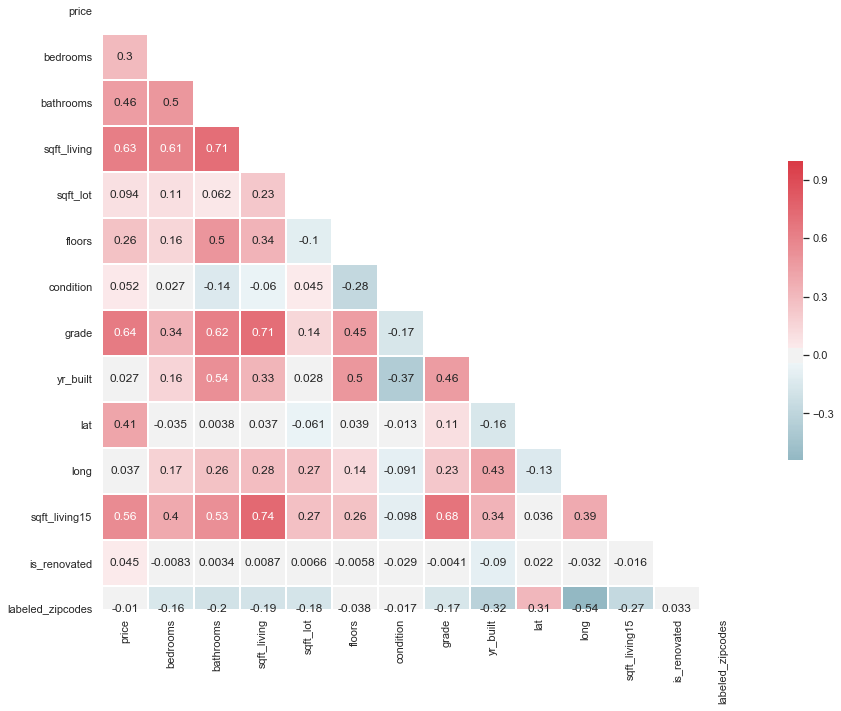

In [125]:
#Updated after fixing multicollinearity issues

sns.set(style="white")
#Correlations are low - good thing?


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

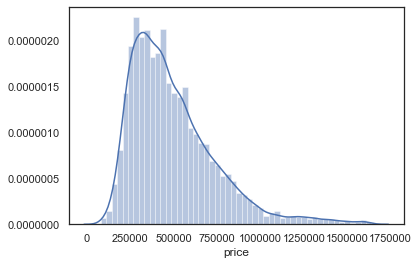

In [127]:
x = df['price']
ax = sns.distplot(x)

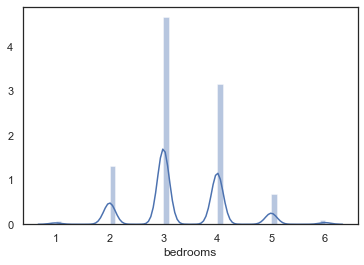

In [128]:
x = df['bedrooms']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


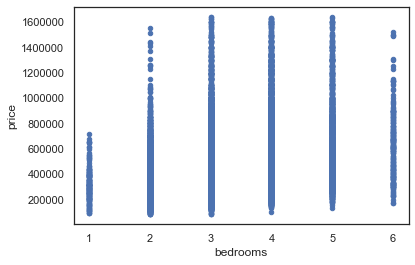

In [141]:
df.plot('bedrooms','price',kind='scatter')

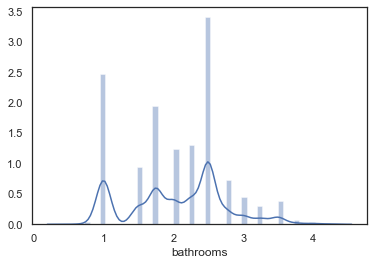

In [129]:
x = df['bathrooms']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


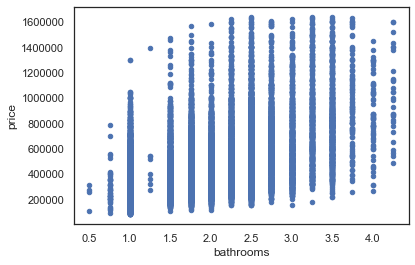

In [142]:
df.plot('bathrooms','price',kind='scatter')

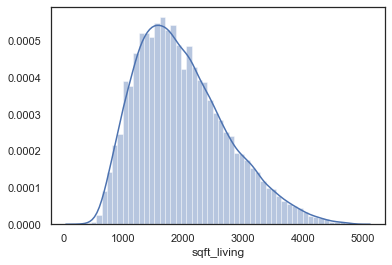

In [130]:
x = df['sqft_living']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


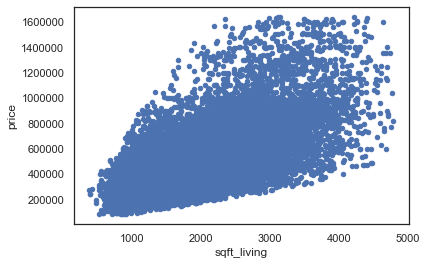

In [143]:
df.plot('sqft_living','price',kind='scatter')

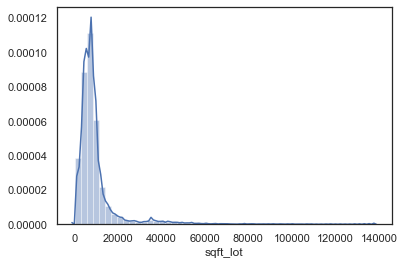

In [131]:
x = df['sqft_lot']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


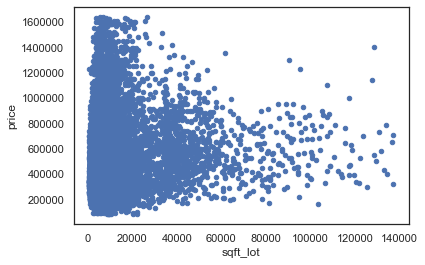

In [144]:
df.plot('sqft_lot','price',kind='scatter')

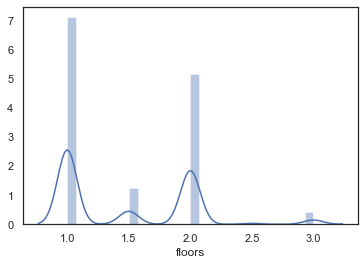

In [132]:
x = df['floors']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


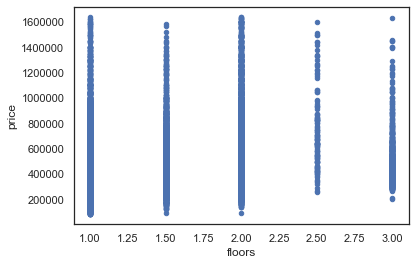

In [145]:
df.plot('floors','price',kind='scatter')

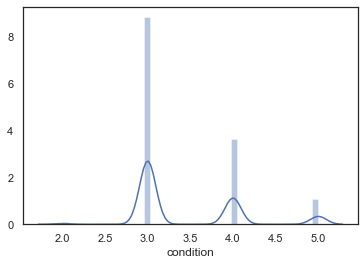

In [133]:
x = df['condition']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


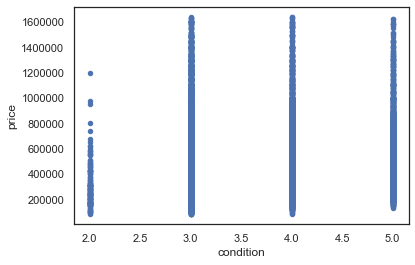

In [146]:
df.plot('condition','price',kind='scatter')

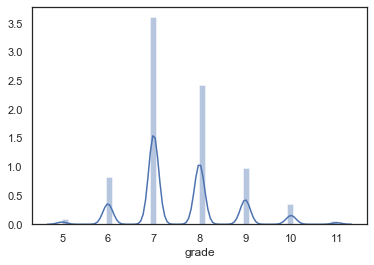

In [134]:
x = df['grade']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


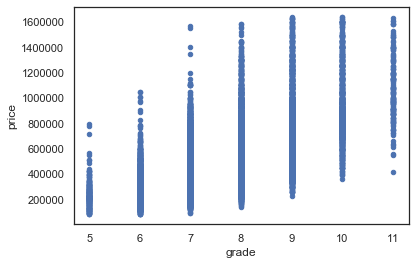

In [147]:
df.plot('grade','price',kind='scatter')

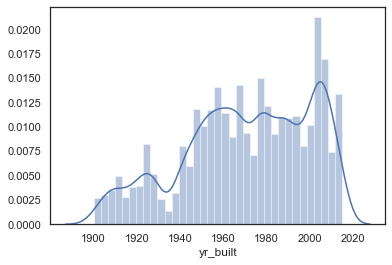

In [135]:
x = df['yr_built']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


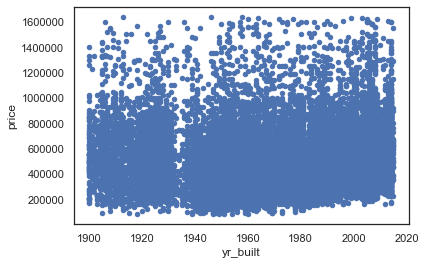

In [148]:
df.plot('yr_built','price',kind='scatter')

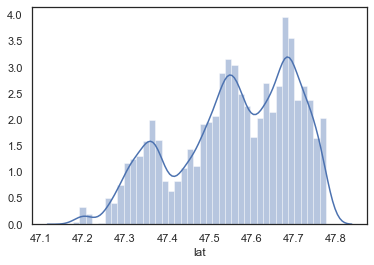

In [136]:
x = df['lat']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


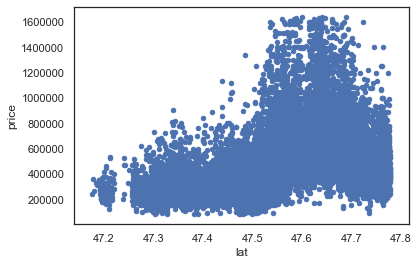

In [149]:
df.plot('lat','price',kind='scatter')

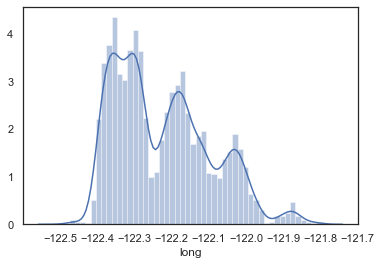

In [137]:
x = df['long']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


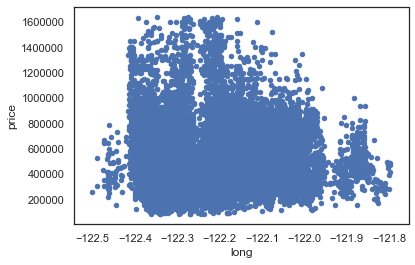

In [150]:
df.plot('long','price',kind='scatter')

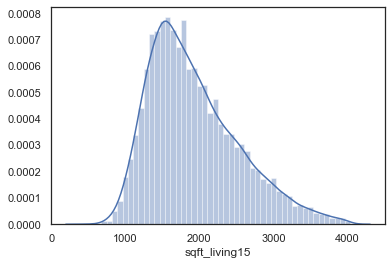

In [138]:
x = df['sqft_living15']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


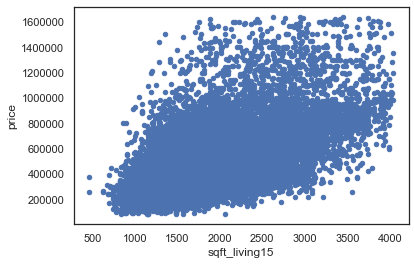

In [151]:
df.plot('sqft_living15','price',kind='scatter')

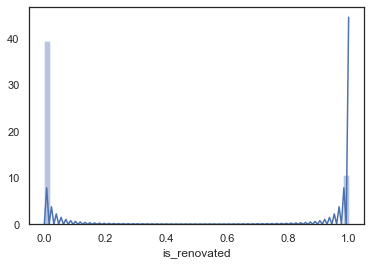

In [139]:
x = df['is_renovated']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


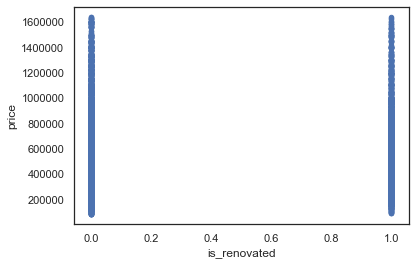

In [152]:
df.plot('is_renovated','price',kind='scatter')

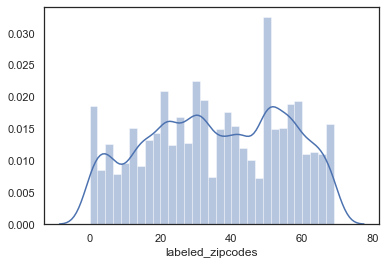

In [140]:
x = df['labeled_zipcodes']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


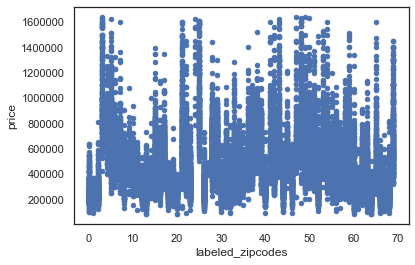

In [153]:
df.plot('labeled_zipcodes','price',kind='scatter')

In [64]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)
threshold = 3
print(np.where(z > 3))
df.info()

[[1.1122099  0.39197209 1.51854687 ... 0.38889944 0.51678563 1.56710353]
 [0.16934113 0.39197209 0.27812214 ... 0.16804953 1.93503834 0.99797909]
 [1.28208332 1.559551   1.51854687 ... 0.12108145 1.93503834 1.01982576]
 ...
 [0.38162851 1.559551   1.87788068 ... 0.79340231 0.51678563 1.20493343]
 [0.3901465  0.39197209 0.63745594 ... 0.87334798 0.51678563 1.07156435]
 [0.69421587 1.559551   1.87788068 ... 0.86557549 0.51678563 1.20493343]]
(array([   65,    66,    66, ..., 20007, 20011, 20013]), array([0, 3, 4, ..., 9, 0, 9]))
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20026 entries, 0 to 21596
Data columns (total 17 columns):
price               20026 non-null float64
bedrooms            20026 non-null int64
bathrooms           20026 non-null float64
sqft_living         20026 non-null int64
sqft_lot            20026 non-null int64
floors              20026 non-null float64
waterfront          20026 non-null float64
condition           20026 non-null int64
grade               20

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [ ]:
df = df[(z < 3).all(axis=1)]

In [107]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,is_renovated,labeled_zipcodes
price,1.000000,0.302801,0.456973,0.633320,0.094437,0.259022,0.052127,0.643637,0.520662,0.026971,0.412809,0.036663,0.560578,0.086189,0.044851,-0.010425
bedrooms,0.302801,1.000000,0.495088,0.605480,0.107665,0.156962,0.027066,0.335978,0.480945,0.164052,-0.035250,0.171568,0.399099,0.108931,-0.008298,-0.164195
bathrooms,0.456973,0.495088,1.000000,0.713142,0.062406,0.504636,-0.135152,0.619138,0.630291,0.536314,0.003779,0.260693,0.531862,0.065569,0.003433,-0.195136
sqft_living,0.633320,0.605480,0.713142,1.000000,0.227845,0.337490,-0.059867,0.713282,0.842611,0.332045,0.036533,0.280794,0.742796,0.229952,0.008659,-0.189758
sqft_lot,0.094437,0.107665,0.062406,0.227845,1.000000,-0.103517,0.045109,0.142173,0.212137,0.027906,-0.060599,0.271043,0.269614,0.814160,0.006617,-0.180496
floors,0.259022,0.156962,0.504636,0.337490,-0.103517,1.000000,-0.278587,0.454940,0.535864,0.500345,0.039112,0.140164,0.259435,-0.107197,-0.005761,-0.037605
condition,0.052127,0.027066,-0.135152,-0.059867,0.045109,-0.278587,1.000000,-0.166380,-0.174899,-0.367244,-0.012938,-0.091490,-0.098145,0.054430,-0.028585,-0.016576
grade,0.643637,0.335978,0.619138,0.713282,0.142173,0.454940,-0.166380,1.000000,0.708507,0.463976,0.107837,0.227544,0.677731,0.156018,-0.004074,-0.168507
sqft_above,0.520662,0.480945,0.630291,0.842611,0.212137,0.535864,-0.174899,0.708507,1.000000,0.448787,-0.024724,0.397919,0.713506,0.220365,-0.002062,-0.249374
yr_built,0.026971,0.164052,0.536314,0.332045,0.027906,0.500345,-0.367244,0.463976,0.448787,1.000000,-0.156389,0.428652,0.336039,0.048853,-0.090240,-0.323794


In [108]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,is_renovated,labeled_zipcodes
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


# MODEL

In [155]:
#This is a single liner regression. I did this just for fun.
import statsmodels.api as sm
from statsmodels.formula.api import ols
f = 'price~sqft_living'

In [157]:
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.341e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:21:07   Log-Likelihood:            -2.7192e+05
No. Observations:               20026   AIC:                         5.438e+05
Df Residuals:                   20024   BIC:                         5.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.886e+04   3767.534     23.587      0.000    8.15e+04    9.62e+04
sqft_living   205.5552      1.775    115.803      0.000     202.076     209.034
==============================================================================
Omnibus:                     3383.442   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7221.166
Skew:                           1.001   Prob(JB):                         0.00
Kurtosis:                       5.155   Cond. No.                     5.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

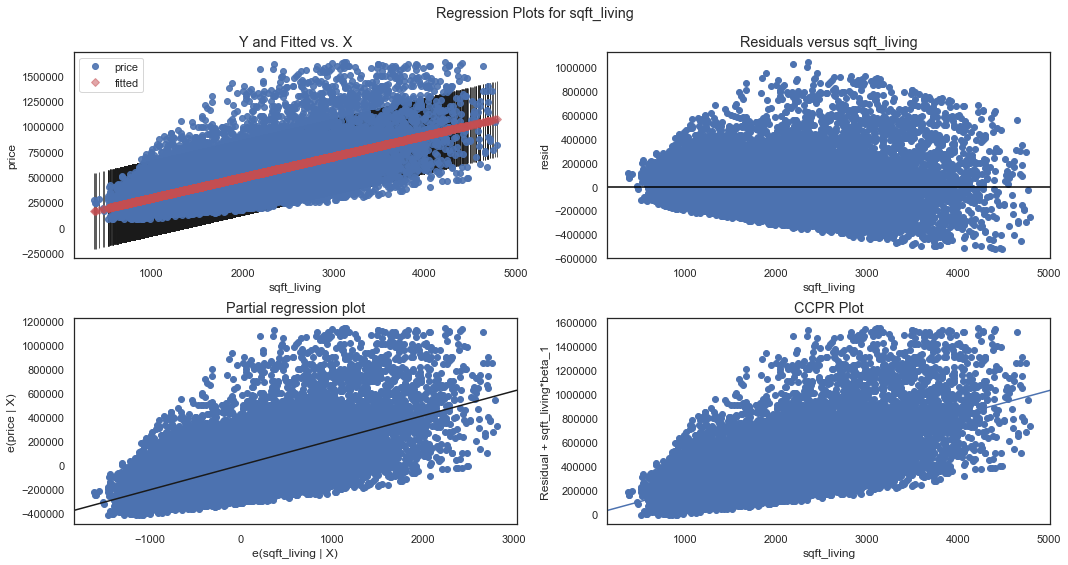

In [158]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


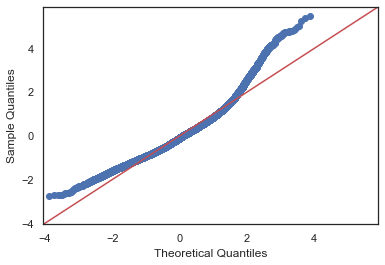

In [159]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()
#Not a good qq plot

In [160]:
#Another single linear regression
f = 'price~grade'

In [161]:
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 1.416e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:30:51   Log-Likelihood:            -2.7170e+05
No. Observations:               20026   AIC:                         5.434e+05
Df Residuals:                   20024   BIC:                         5.434e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.583e+05   9792.723    -67.223      0.000   -6.77e+05   -6.39e+05
grade       1.526e+05   1282.501    119.005      0.000     1.5e+05    1.55e+05
==============================================================================
Omnibus:                     3871.211   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8786.449
Skew:                           1.107   Prob(JB):                         0.00
Kurtosis:                       5.373   Cond. No.                         57.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

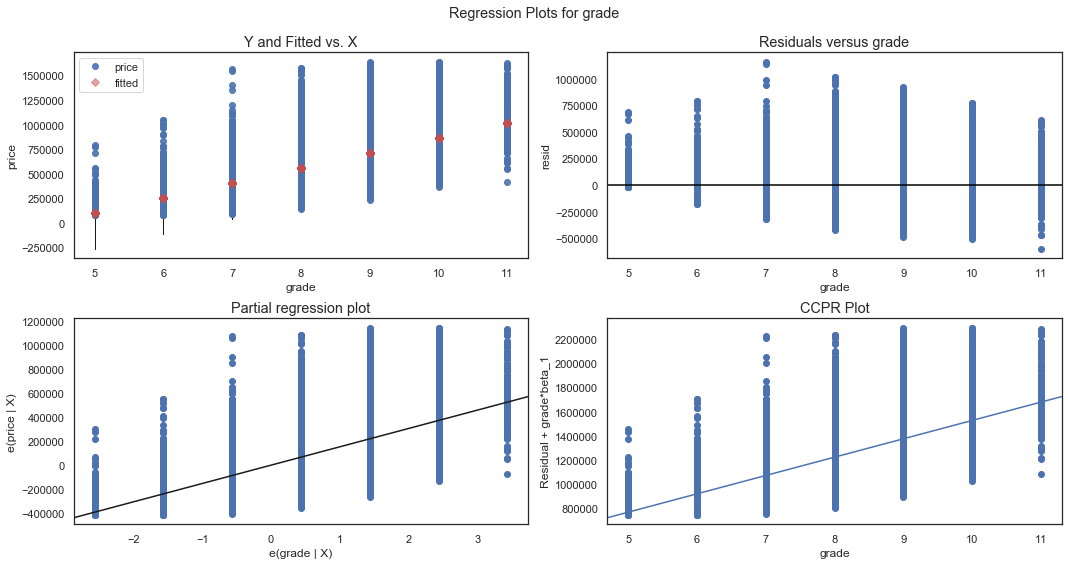

In [163]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


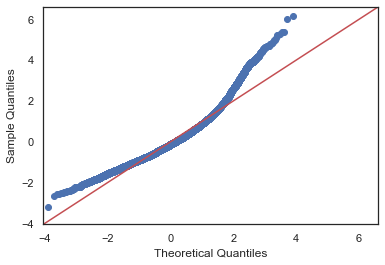

In [164]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [168]:
f = 'price~sqft_living15'

In [169]:
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9176.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:46:55   Log-Likelihood:            -2.7328e+05
No. Observations:               20026   AIC:                         5.466e+05
Df Residuals:                   20024   BIC:                         5.466e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.848e+04   4792.349     12.203      0.000    4.91e+04    6.79e+04
sqft_living15   227.2021      2.372     95.792      0.000     222.553     231.851
==============================================================================
Omnibus:                     4760.303   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12593.543
Skew:                           1.281   Prob(JB):                         0.00
Kurtosis:                       5.921   Cond. No.                     6.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

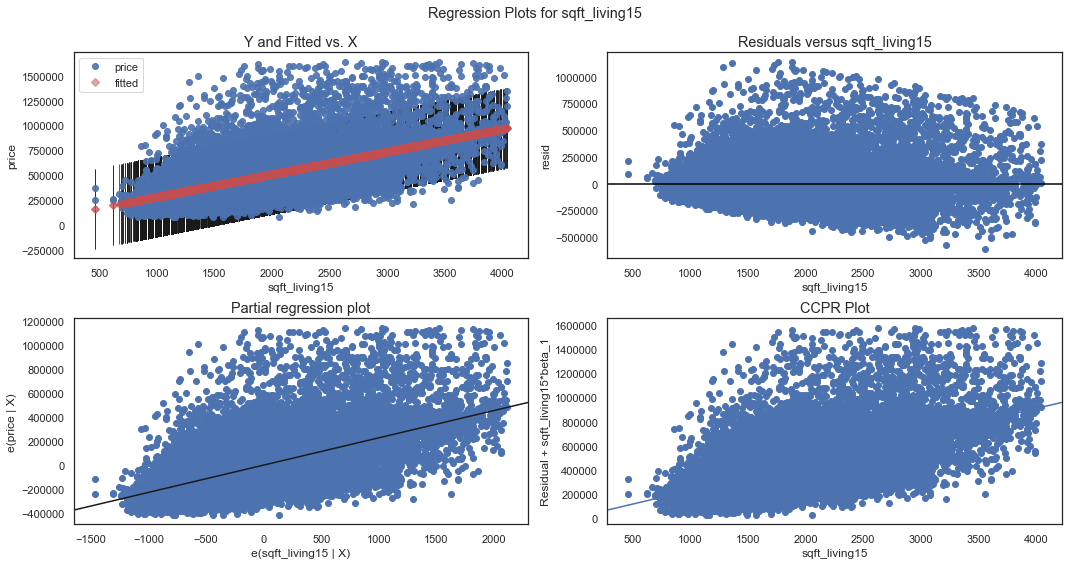

In [170]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15", fig=fig)
plt.show()

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


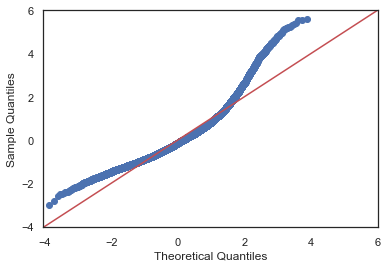

In [171]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [165]:
f = 'price~grade+sqft_living+sqft_living15'

In [166]:
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     6128.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:41:55   Log-Likelihood:            -2.7053e+05
No. Observations:               20026   AIC:                         5.411e+05
Df Residuals:                   20022   BIC:                         5.411e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.247e+05   1.04e+04    -40.973      0.000   -4.45e+05   -4.04e+05
grade          8.691e+04   1819.167     47.775      0.000    8.33e+04    9.05e+04
sqft_living     101.3743      2.735     37.070      0.000      96.014     106.734
sqft_living15    32.4964      3.255      9.984      0.000      26.116      38.876
==============================================================================
Omnibus:                     3465.569   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7587.631
Skew:                           1.013   Prob(JB):                         0.00
Kurtosis:                       5.233   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.